# Análise Exploratória e Visualização de Dados

Neste notebook tem como objetivo apresentar as visualizações utilizadas na análise dos dados de sono e justificar o uso de cada gráfico. 

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sys.path.append(os.path.abspath(".."))  
from src.graficos import criar_boxplot, criar_scatterplot_outliers, criar_barplot_stacked, criar_pieplot, criar_side_by_side, criar_histograma, criar_scatterplot_pontuacao
from src.prints import imprimir_medias, imprimir_diferenca_medias
sns.set_theme()

In [2]:
data = pd.read_csv("../data/cleaned.csv")

In [3]:
data

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
0,2025-05-01,quinta-feira,72,90,478,337,70.50,39,8.16,102,21.34,6,3
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
2,2025-05-03,sábado,80,90,539,360,66.79,83,15.40,96,17.81,12,4
3,2025-05-04,domingo,77,95,515,338,65.63,72,13.98,105,20.39,29,4
4,2025-05-05,segunda-feira,85,89,428,258,60.28,72,16.82,98,22.90,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2025-07-08,terça-feira,78,71,519,338,65.13,63,12.14,118,22.74,8,3
69,2025-07-09,quarta-feira,82,75,505,358,70.89,73,14.46,74,14.65,5,3
70,2025-07-10,quinta-feira,76,74,472,324,68.64,58,12.29,90,19.07,4,2
71,2025-07-11,sexta-feira,85,77,483,309,63.98,76,15.73,98,20.29,9,2


Criação de lista "Métricas"

In [4]:
metricas = ["pontuacao","regularidade", 
            "duracao", "sono_leve","sono_leve_perc", 
            "sono_profundo", "sono_profundo_perc", "REM", "REM_perc", 
            "tempo_acordado", "vezes_acordado"]

### 1. Line Plot — Pontuação ao Longo do Tempo  
Este gráfico foi utilizado por sua clareza na visualização de tendências ao longo do tempo. 

Além disso, a sua estética remete a gráficos de batimentos cardíacos, tornando a análise mais intuitiva ao representar oscilações nas pontuações e suas respectivas datas e visualizar a média geral da pontuação

In [5]:
media_pontuacao = data["pontuacao"].mean()

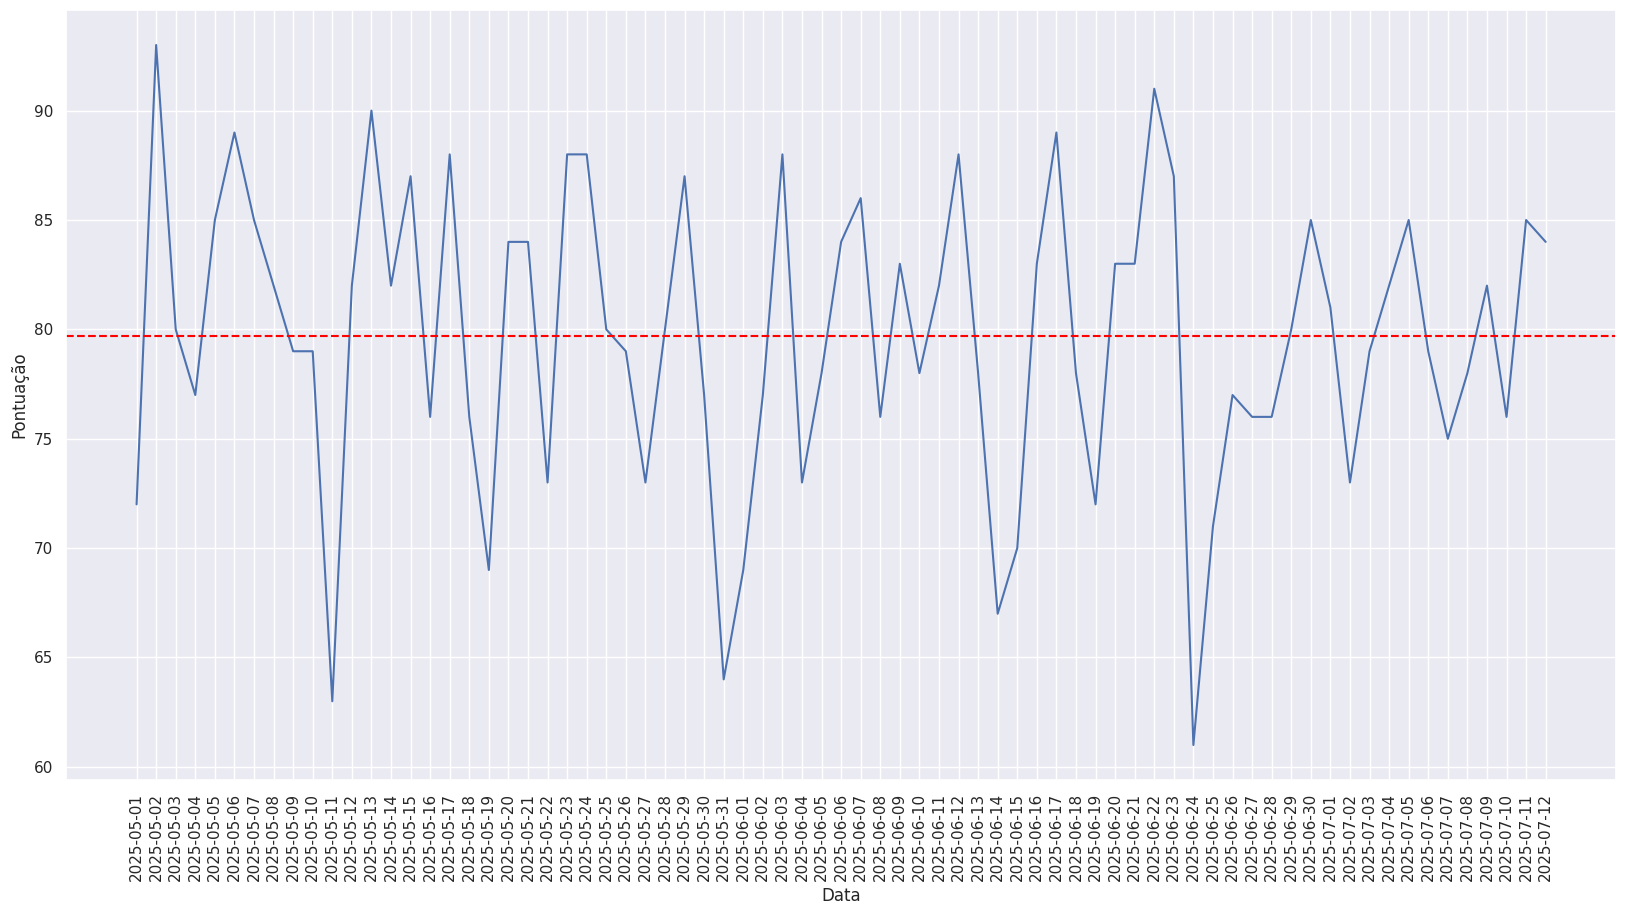

In [6]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x="data", y="pontuacao")
plt.axhline(media_pontuacao, color="red", linestyle="--")
plt.ylabel("Pontuação")
plt.xticks(rotation=90)
plt.xlabel("Data")
plt.show()

### 2. Histograma — Distribuição 
O histograma foi utilizado para analisar a distribuição das variáveis de sono. Permitindo observar:

- A frequência com que os valores ocorrem
- A simetria ou assimetria da distribuição
- A presença de caudas ou valores extremos 

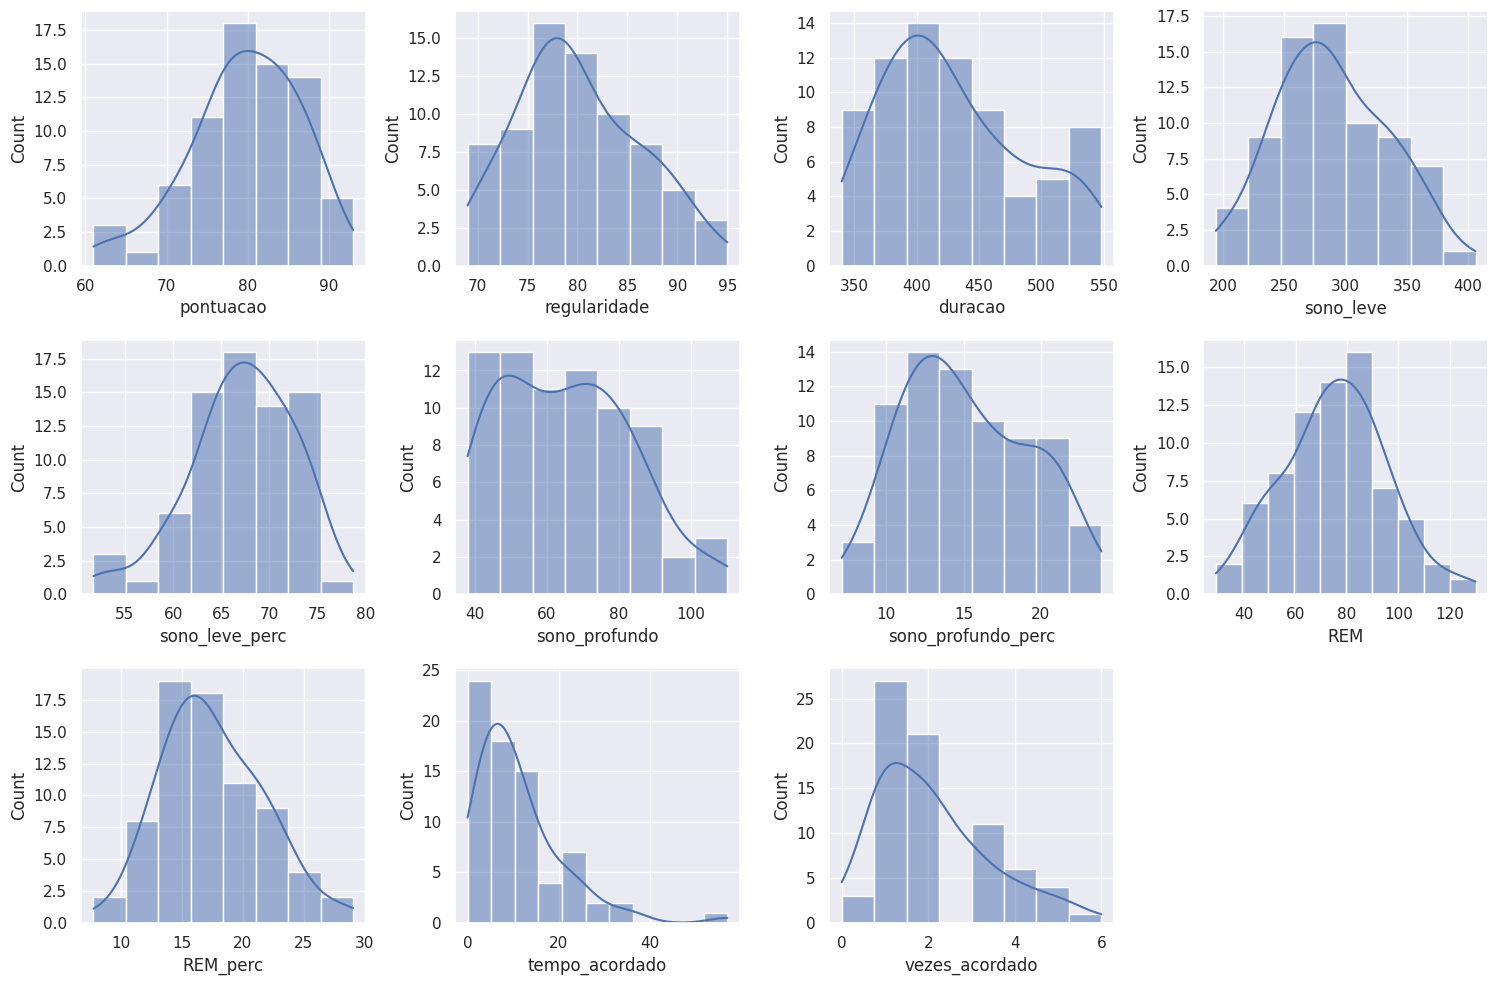

In [7]:
criar_histograma(dataframe=data, metricas=metricas, nrows=3, ncols=4)

É possível observar que a maioria das Distribuições lembram bastante uma Distribuição Normal ou quase normal, o que é bom, indicando que os dados são bem consistentes e possuem poucos outliers.
Algumas variáveis possuem cauda longa, sendo a mais clara:
- **Tempo acordado**: De forma geral eu acordo no meio da noite para ir ao banheiro e normalmente após ir ao banheiro já pego no sono, porém houveram alguns dias atípicos onde não tive essa facilidade.

Também referente ao **tempo acordado**, o número de **vezes acordado**. A grande maioria das vezes que levantei foi por volta de 1 a 2 vezes. 
Não realizei o registro da temperatura média durante as noites de sono, mas por observação própria posso dizer que as noites em que levantei mais possam também relacionadas a descômodo causado pelo calor.

---

### 3. Box Plot — Detecção de Outliers  
O box plot foi utilizado como uma visualização inicial para verificar a presença de outliers nas variáveis. Assim, sendo possível identificar outliers.

Foram identificados outliers nas seguintes variáveis:
- Pontuação  
- Sono leve (%)  
- REM  
- REM (%)  
- Tempo acordado  

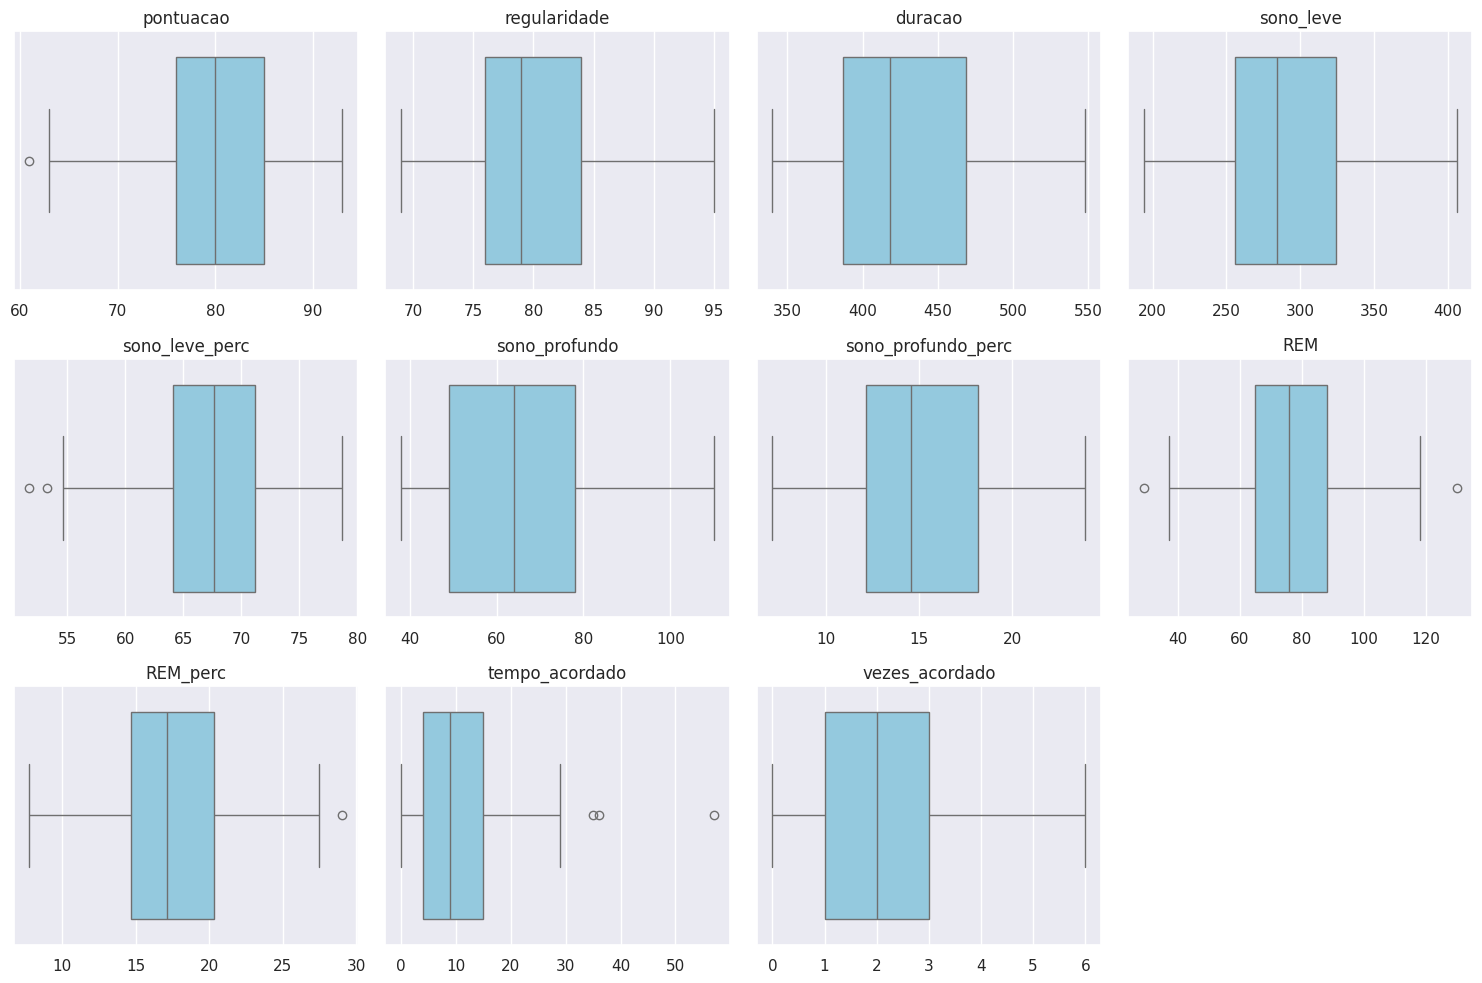

In [8]:
criar_boxplot(dataframe=data, metricas=metricas)

É possível observar outliers nas seguintes variáveis:
- Pontuação (que será o target)
- Sono leve 
- REM
- REM %
- Tempo acordado

A princípio não limparei esses outliers, pois acredito que seja válido manter para indicicar noites ruins de sono.

In [9]:
outliers = ["pontuacao", "sono_leve_perc", "REM", "REM_perc", "tempo_acordado"]

### 4. Scatter Plot + Line Plot — Análise de Outliers  
Para uma visualização mais detalhada das variáveis com outliers, foram utilizados os seguintes gráficos:

- **Scatter Plot**: Exibe os registros dentro dos limites esperados em azul e os outliers em vermelho.  
- **Line Plot**: Destaca os limites inferior e superior, além da média da variável, facilitando a identificação visual dos valores fora do padrão.


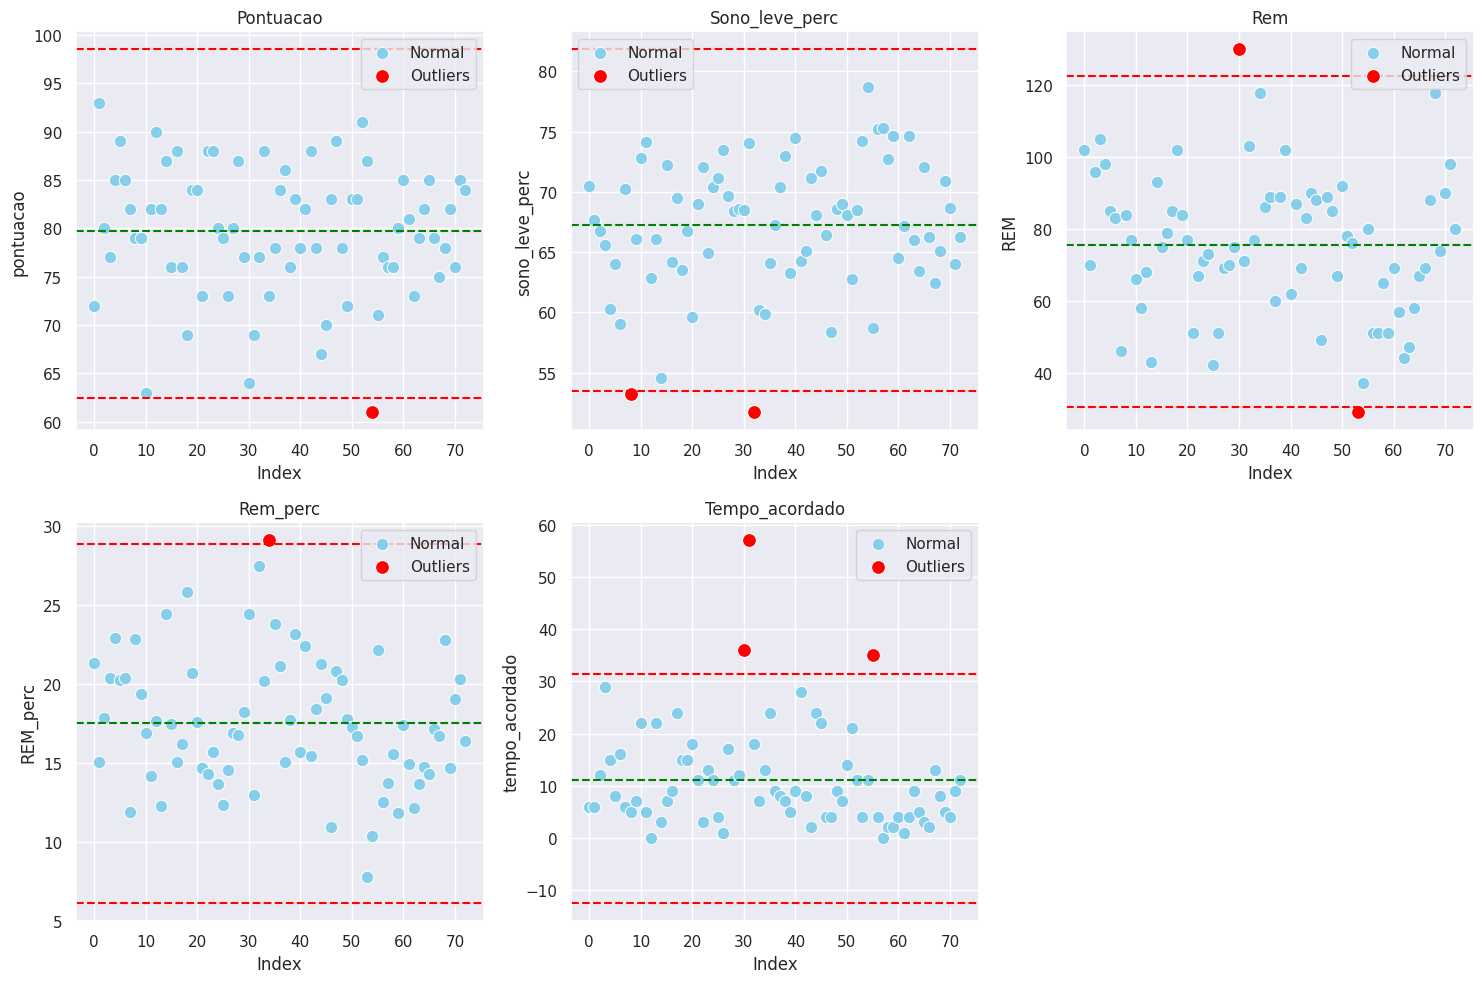

(<Figure size 1500x1000 with 5 Axes>,
 array([<Axes: title={'center': 'Pontuacao'}, xlabel='Index', ylabel='pontuacao'>,
        <Axes: title={'center': 'Sono_leve_perc'}, xlabel='Index', ylabel='sono_leve_perc'>,
        <Axes: title={'center': 'Rem'}, xlabel='Index', ylabel='REM'>,
        <Axes: title={'center': 'Rem_perc'}, xlabel='Index', ylabel='REM_perc'>,
        <Axes: title={'center': 'Tempo_acordado'}, xlabel='Index', ylabel='tempo_acordado'>,
        <Axes: >], dtype=object))

In [10]:
criar_scatterplot_outliers(outliers=outliers, dataframe=data, nrows=2, ncols=3)

Visualização de Histogramas

Visualização geral de Pontuação e linha de média

### 5. Heatmap de Correlação  
O gráfico de correlação foi utilizado para identificar quais variáveis possuem maior relação com a **Pontuação** (target). Essa análise é fundamental para:
- Entender quais fatores mais influenciam a pontuação
- Auxiliar na seleção de features para futuros modelos preditivos

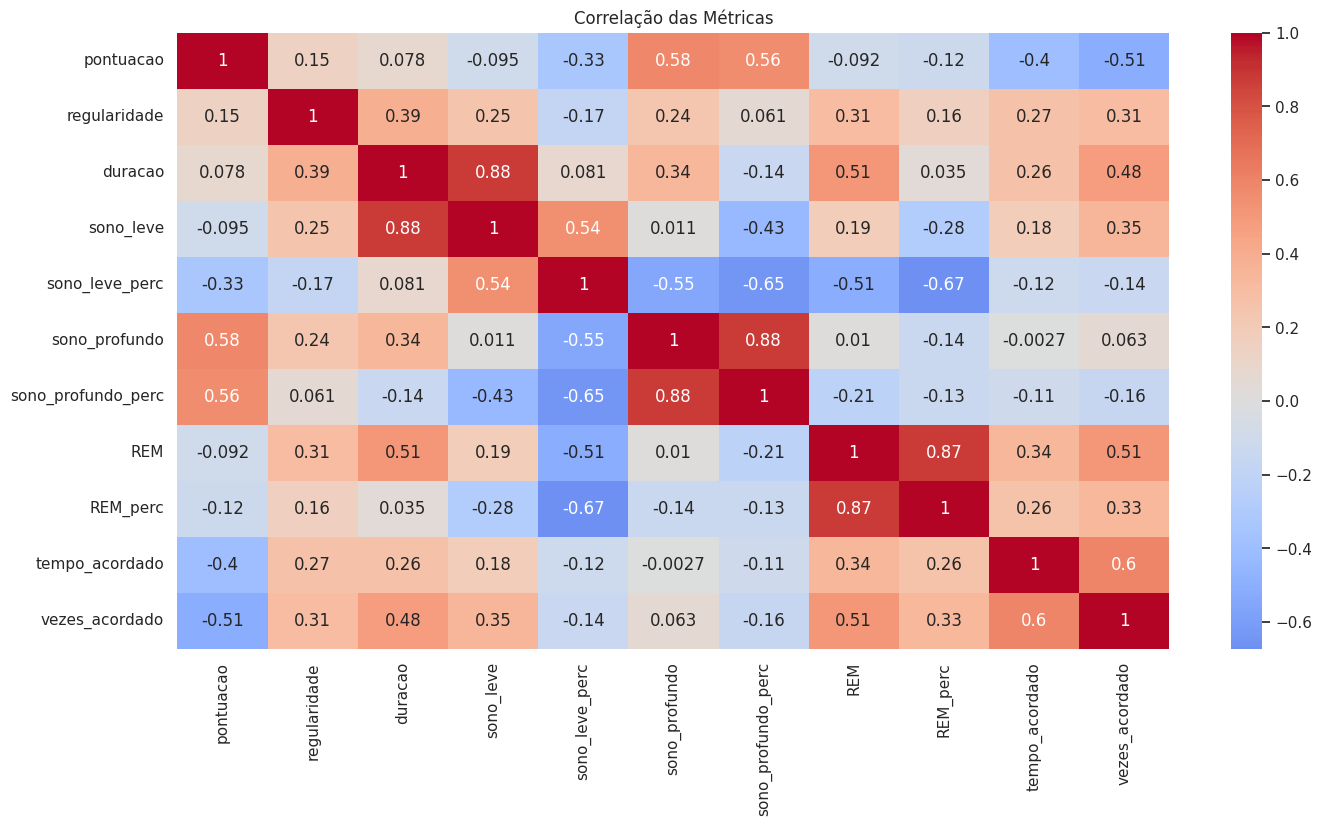

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(data[metricas].corr(),  annot=True, cmap="coolwarm", center=0)
plt.title("Correlação das Métricas")
plt.show()

Correlações mais fortes destacadas:
- Sono leve %: -0.33
- Sono profundo: 0.58
- Sono profundo %: 0.56
- REM %: -0.12
- Tempo acordado: -0.4
- Vezes acordado: -0.51

---

### 6. Scatter Plot — Distribuição Geral das Variáveis  
O scatter plot foi utilizado para visualizar a dispersão de diferentes variáveis. Sendo possível identificar padrões, aglomerações ou desvios nos dados.

Utilização de Bar Plot (Stacked) para visualizar como está composta a duração do sono 

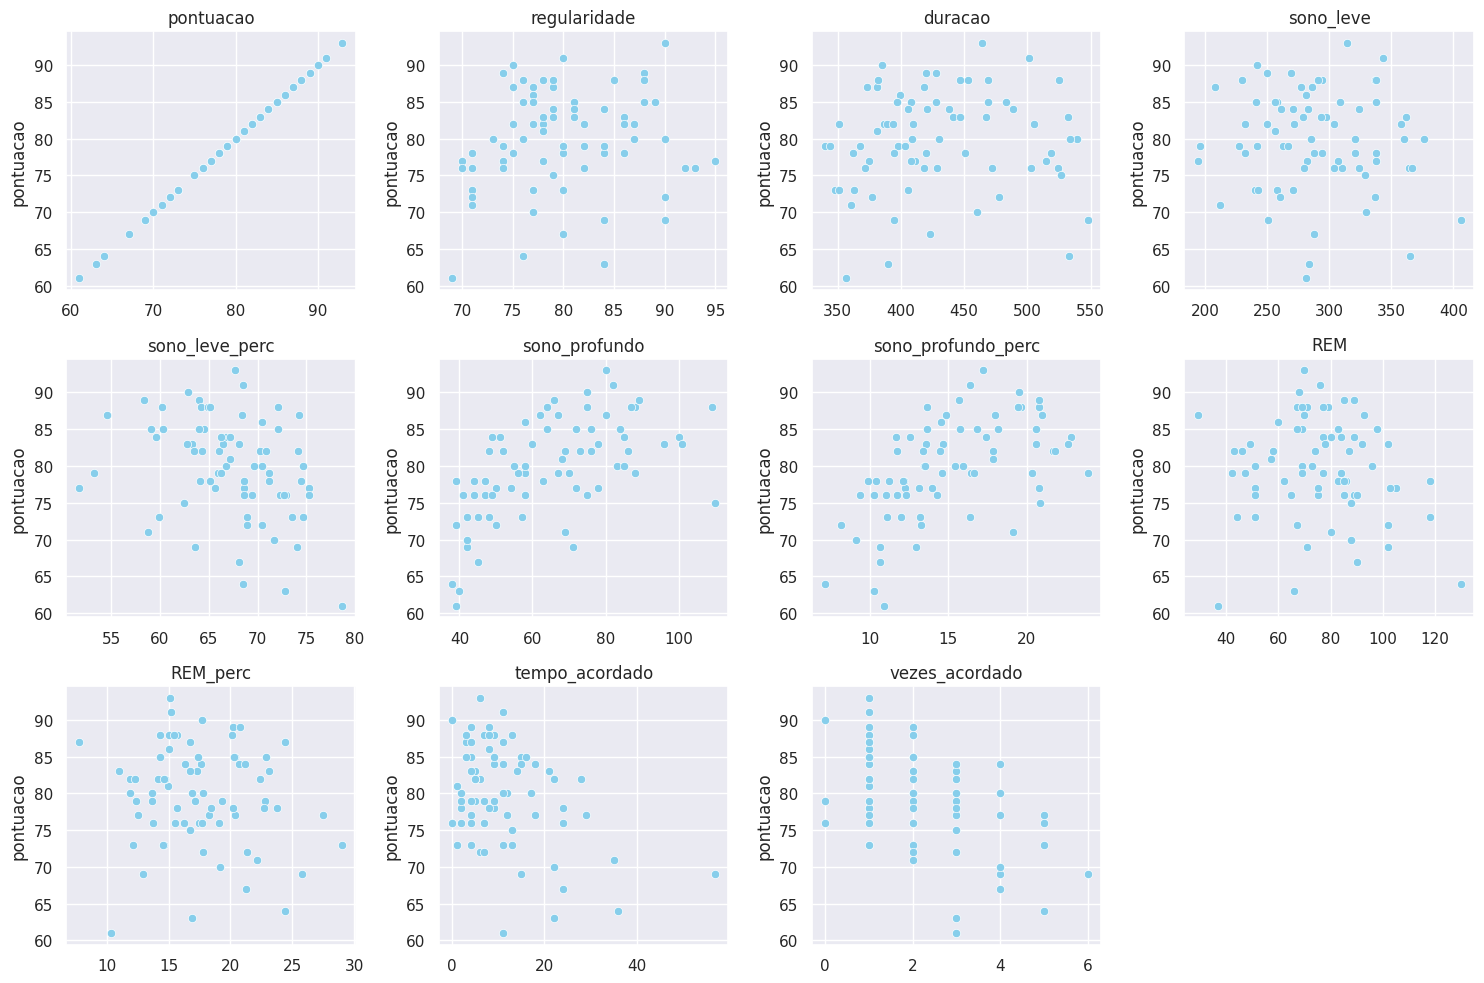

In [12]:
criar_scatterplot_pontuacao(dataframe=data, metricas=metricas)

### 7. Bar Plot Empilhado — Composição do Sono por Dia  
O gráfico de barras empilhadas foi utilizado para representar a composição da duração do sono ao longo dos dias. Ele mostra a proporção de tempo dedicada a:
- Sono leve  
- Sono profundo  
- Sono REM  

Essa visualização facilita a análise da qualidade e equilíbrio das fases do sono diariamente.

In [13]:
composicao_sono = ["sono_leve", "sono_profundo", "REM"]

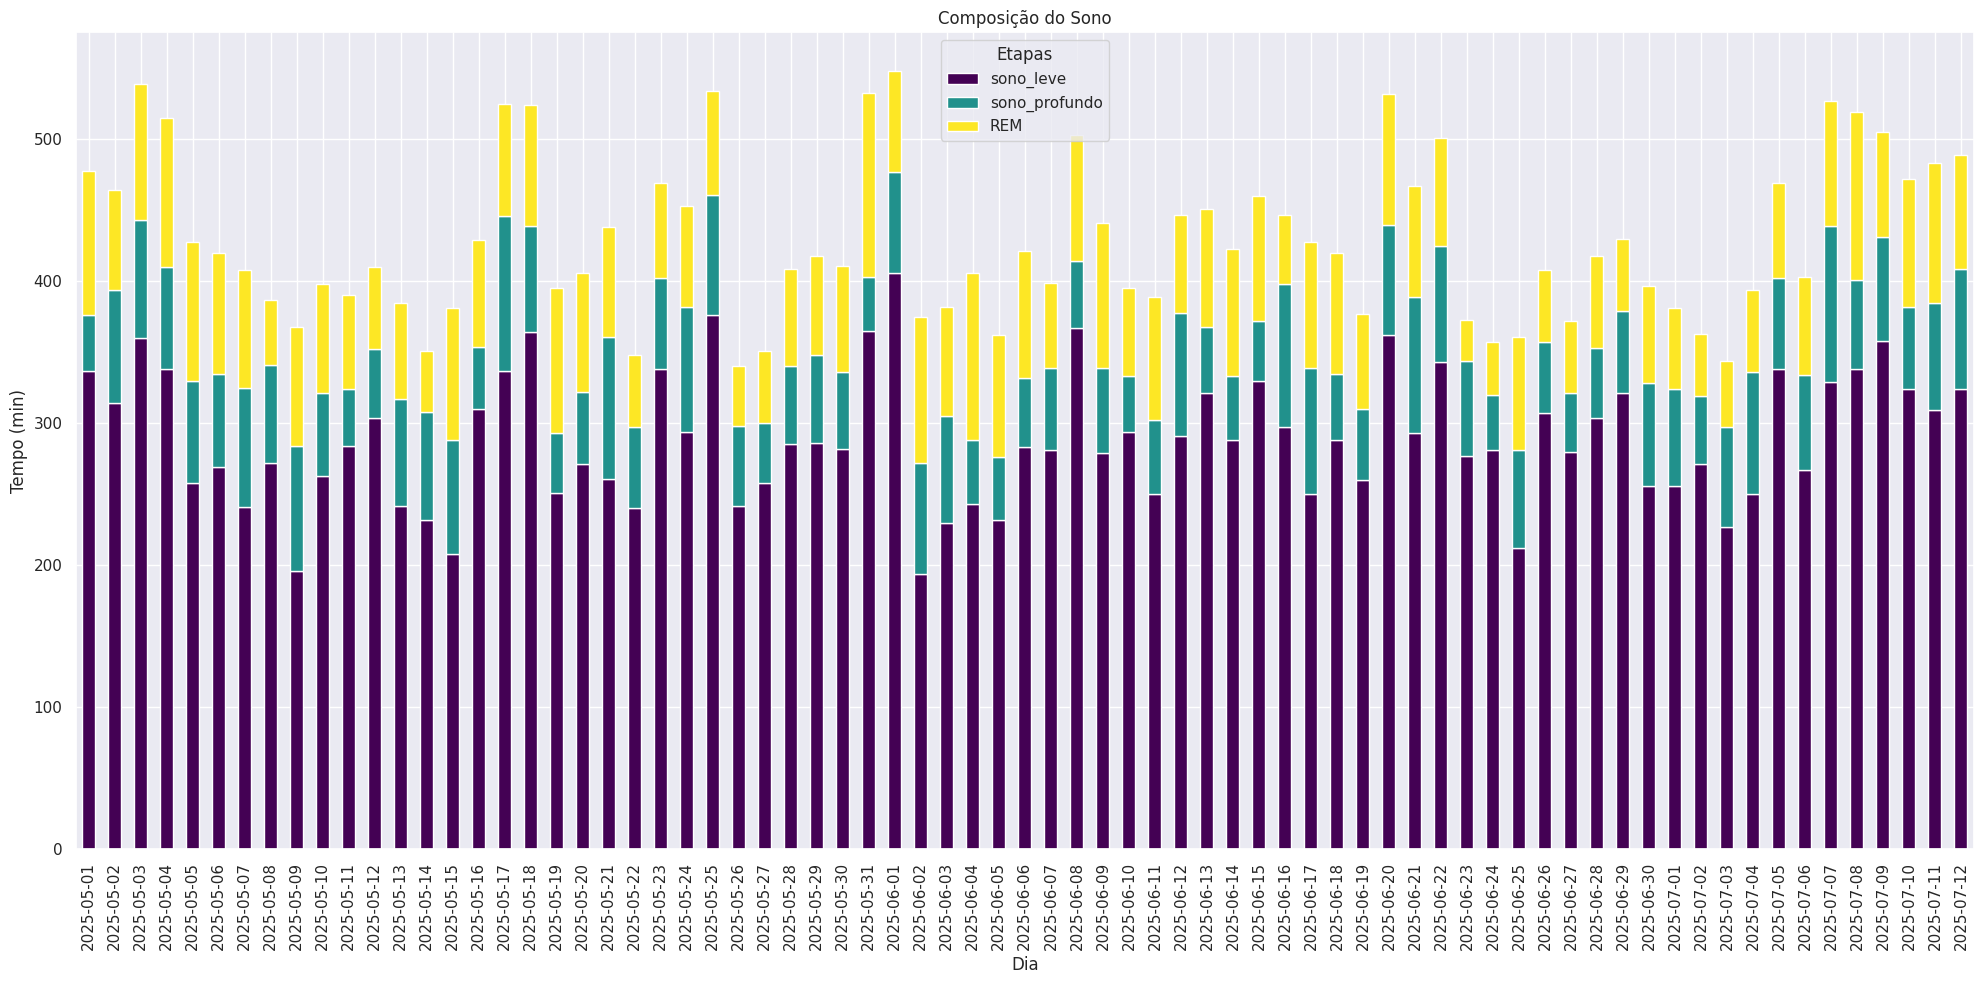

In [14]:
criar_barplot_stacked(dataframe=data, composicao_sono=composicao_sono)

In [15]:
total_sono = data[["sono_leve", "sono_profundo", "REM"]].sum()
labels = total_sono.index.tolist()
values = total_sono.values.tolist()

## 8. Pie Chart — Composição Geral do Sono  
O gráfico de pizza foi utilizado para representar a composição do sono de forma agregada, somando os dados de todos os dias. Ele fornece uma visão clara das proporções relativas de cada fase do sono no total registrado.

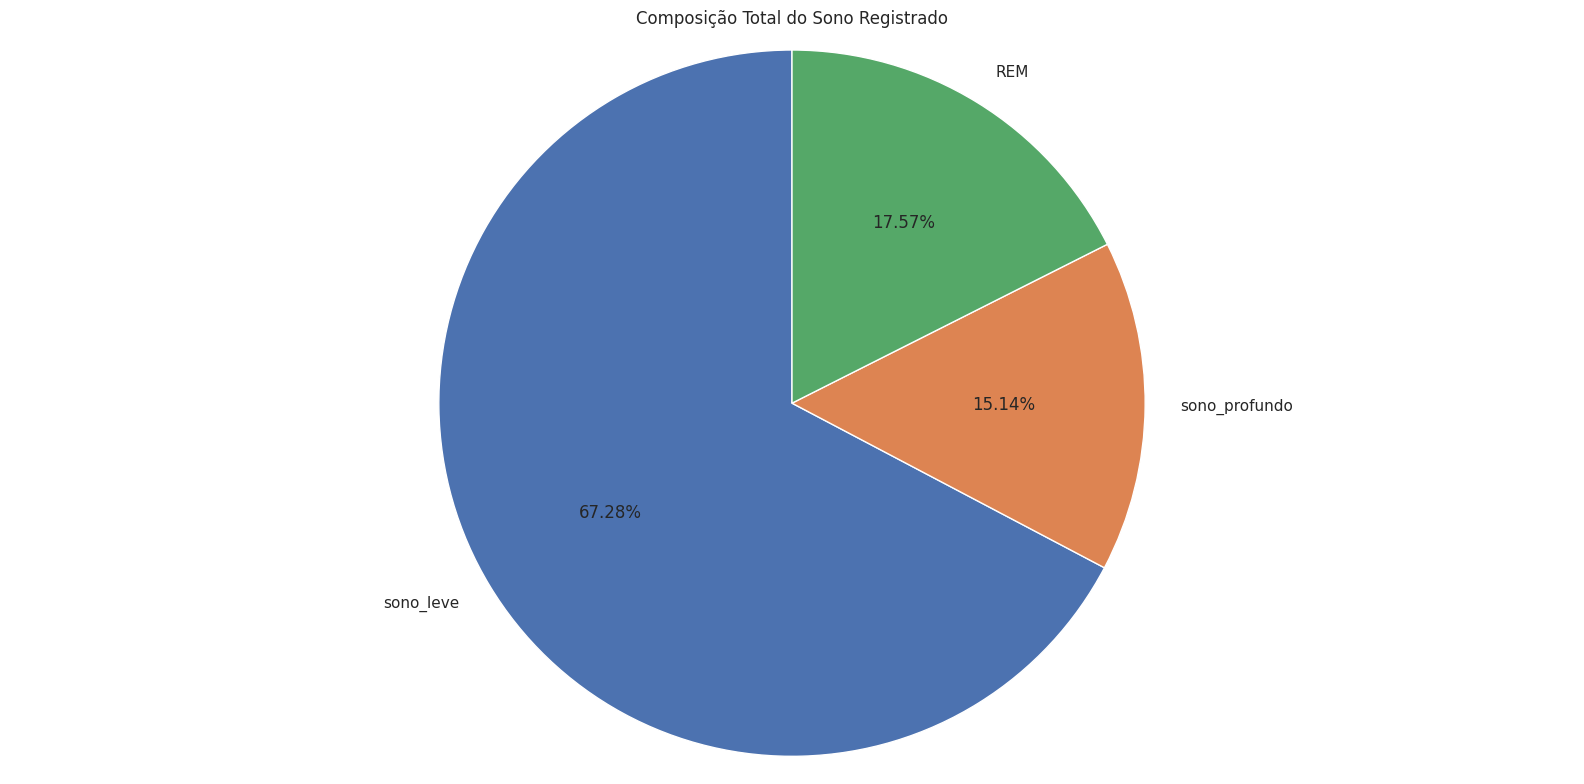

In [16]:
criar_pieplot(dataframe=data, values=values, labels=labels)

Como esperado, o grande pedaço da pizza (ou torta) é referente ao sono leve. A porcentagem de sono profundo e REM está bem equilibrada.
- Sono leve: 67.28%
- Sono profundo: 15.14%
- REM: 17.57%

In [17]:
ordem = ["segunda-feira", "terça-feira", "quarta-feira", "quinta-feira", "sexta-feira",
         "sábado", "domingo"]

### Análise dos dias da semana
A princípio vamos observar a média geral da pontuação por dia da semana: 
- Sexta: 81.91% -> Maior
- Domingo: 76.10% -> Menor

Temos uma diferença de 5,81 na pontuação.


In [18]:
data_semana = data.copy()

In [19]:
data_semana["dia_semana"] = pd.Categorical(data_semana["dia_semana"], categories=ordem, ordered=True)

In [20]:
medias = data_semana.groupby("dia_semana")["pontuacao"].mean().round(2)

/tmp/ipykernel_15967/2131069414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = data_semana.groupby("dia_semana")["pontuacao"].mean().round(2)


In [21]:
medias_df = medias.reset_index()
medias_df.columns = ["dia_semana", "pontuacao"]

In [22]:
medias_df = medias_df.sort_values("pontuacao", ascending=True)

In [23]:
medias_df

,dia_semana,pontuacao
6,domingo,76.10
2,quarta-feira,79.00
3,quinta-feira,79.18
5,sábado,80.00
0,segunda-feira,80.50
1,terça-feira,81.10
4,sexta-feira,81.91


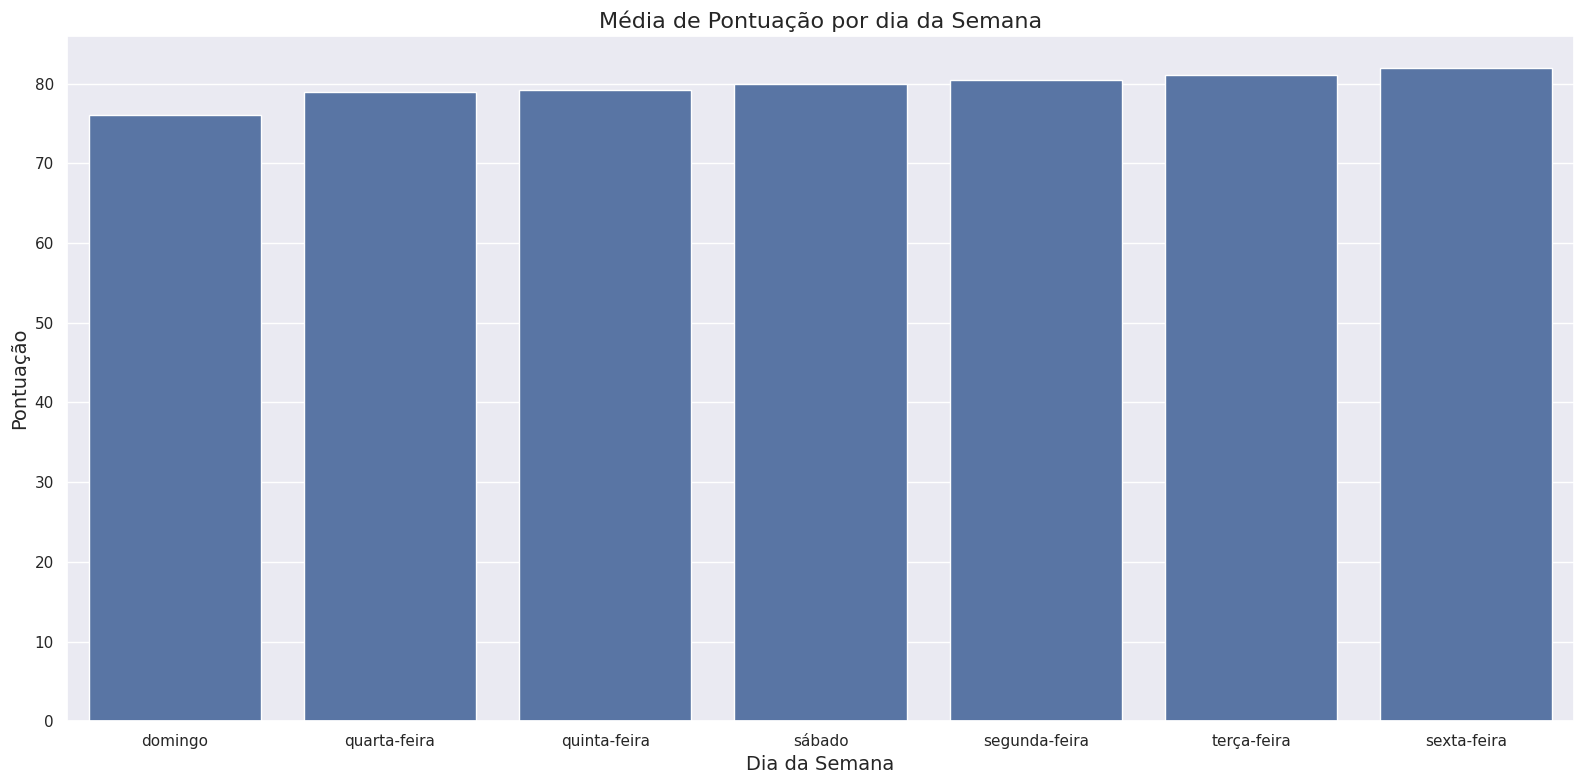

In [24]:
plt.figure(figsize=(16, 8))
sns.barplot(data=medias_df, x="dia_semana", y="pontuacao", order=medias_df["dia_semana"])
plt.title("Média de Pontuação por dia da Semana", size=16)
plt.xlabel("Dia da Semana", size=14)
plt.ylabel("Pontuação", size=14)
plt.tight_layout()
plt.show()

### Análise da média dos melhores e piores dias

Primeiros vamos ordenar a pontuação de forma decrescente.

Criação de novas variáveis para armazenar as 15 melhores e 15 piores pontuações.

Aparição dos dias:


|       Dia      | Melhores | Piores |
|----------------|----------|--------|
| Segunda-feira  |    1     |    2   |
| Terça-feira | 4 | 2 |
|Quarta-feira| 0  |  3 |
|Quinta-feira| 3  | 3  |
|Sexta-feira| 3  |  0 |
|Sábado| 3  | 2  |
|Domingo| 1  | 3  |

Sexta-feira que foi onde a média de pontuação foi maior, não apareceu nenhuma vez entre as 15 menores pontuações registradas.
Domingo, dia com a menor média de pontuação, possui apenas 1 dia registrado entre os 15 melhores.

In [25]:
data_ordenado = data.sort_values(by="pontuacao", ascending=False)
maiores = data_ordenado.head(15)
menores = data_ordenado.tail(15)

In [26]:
maiores_dias_semana = maiores["dia_semana"].value_counts()
maiores_dias_semana

dia_semana
terça-feira      4
sexta-feira      3
quinta-feira     3
sábado           3
domingo          1
segunda-feira    1
Name: count, dtype: int64

In [27]:
menores_dias_semana = menores["dia_semana"].value_counts()
menores_dias_semana

dia_semana
quarta-feira     3
quinta-feira     3
domingo          3
segunda-feira    2
terça-feira      2
sábado           2
Name: count, dtype: int64

In [28]:
maiores

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
52,2025-06-22,domingo,91,80,501,343,68.46,82,16.37,76,15.17,11,1
12,2025-05-13,terça-feira,90,75,385,242,62.86,75,19.48,68,17.66,0,0
5,2025-05-06,terça-feira,89,88,420,269,64.05,66,15.71,85,20.24,8,2
47,2025-06-17,terça-feira,89,74,428,250,58.41,89,20.79,89,20.79,4,1
16,2025-05-17,sábado,88,88,525,337,64.19,109,20.76,79,15.05,9,2
22,2025-05-23,sexta-feira,88,76,469,338,72.07,64,13.65,67,14.29,3,1
42,2025-06-12,quinta-feira,88,85,447,291,65.10,87,19.46,69,15.44,8,2
33,2025-06-03,terça-feira,88,79,382,230,60.21,75,19.63,77,20.16,7,1
23,2025-05-24,sábado,88,78,453,294,64.90,88,19.43,71,15.67,13,2


In [29]:
menores

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
67,2025-07-07,segunda-feira,75,79,527,329,62.43,110,20.87,88,16.70,13,3
34,2025-06-04,quarta-feira,73,80,406,243,59.85,45,11.08,118,29.06,13,5
62,2025-07-02,quarta-feira,73,77,363,271,74.66,48,13.22,44,12.12,4,1
26,2025-05-27,terça-feira,73,71,351,258,73.50,42,11.97,51,14.53,1,1
21,2025-05-22,quinta-feira,73,77,348,240,68.97,57,16.38,51,14.66,11,2
0,2025-05-01,quinta-feira,72,90,478,337,70.50,39,8.16,102,21.34,6,3
49,2025-06-19,quinta-feira,72,71,377,260,68.97,50,13.26,67,17.77,7,2
55,2025-06-25,quarta-feira,71,71,361,212,58.73,69,19.11,80,22.16,35,2
45,2025-06-15,domingo,70,77,460,330,71.74,42,9.13,88,19.13,22,4
18,2025-05-19,segunda-feira,69,84,395,251,63.54,42,10.63,102,25.82,15,4


In [30]:
media_maiores = maiores[["pontuacao", "duracao", "sono_leve_perc", "sono_profundo_perc", "REM_perc", "tempo_acordado", "vezes_acordado"]].mean().round(2)
media_menores = menores[["pontuacao", "duracao", "sono_leve_perc", "sono_profundo_perc", "REM_perc", "tempo_acordado", "vezes_acordado"]].mean().round(2)

In [31]:
imprimir_medias(media_maiores)

Média das Maiores 15 Pontuações registradas
-------------------------------------------
Pontuação: 88.27
Duração: 435.2
Sono Leve %: 65.31
Sono Profundo %: 17.77
REM %: 16.92
Tempo acordado: 6.93
Vezes acordado: 1.27


In [32]:
imprimir_medias(media_menores)


Média das Maiores 15 Pontuações registradas
-------------------------------------------
Pontuação: 69.67
Duração: 421.13
Sono Leve %: 69.01
Sono Profundo %: 12.38
REM %: 18.61
Tempo acordado: 18.47
Vezes acordado: 3.2


In [33]:
imprimir_diferenca_medias(media_maiores, media_menores)

Diferença entre as Maiores e Menores
--------------------------------
Pontuação: 18.60
Duração: 14.07
Sono Leve (%): -3.70
Sono Profundo (%): 5.39
REM (%): -1.69
Tempo acordado: -11.54
Vezes acordado: -1.93
--------------------------------


In [34]:
categorias = ["Pontuação", "Duração", "Sono Leve (%)", "Sono Profundo (%)", "REM (%)", "Tempo Acordado", "Vezes Acordado"]

In [35]:
maiores_vals = media_maiores.reset_index(drop=True)
menores_vals = media_menores.reset_index(drop=True)

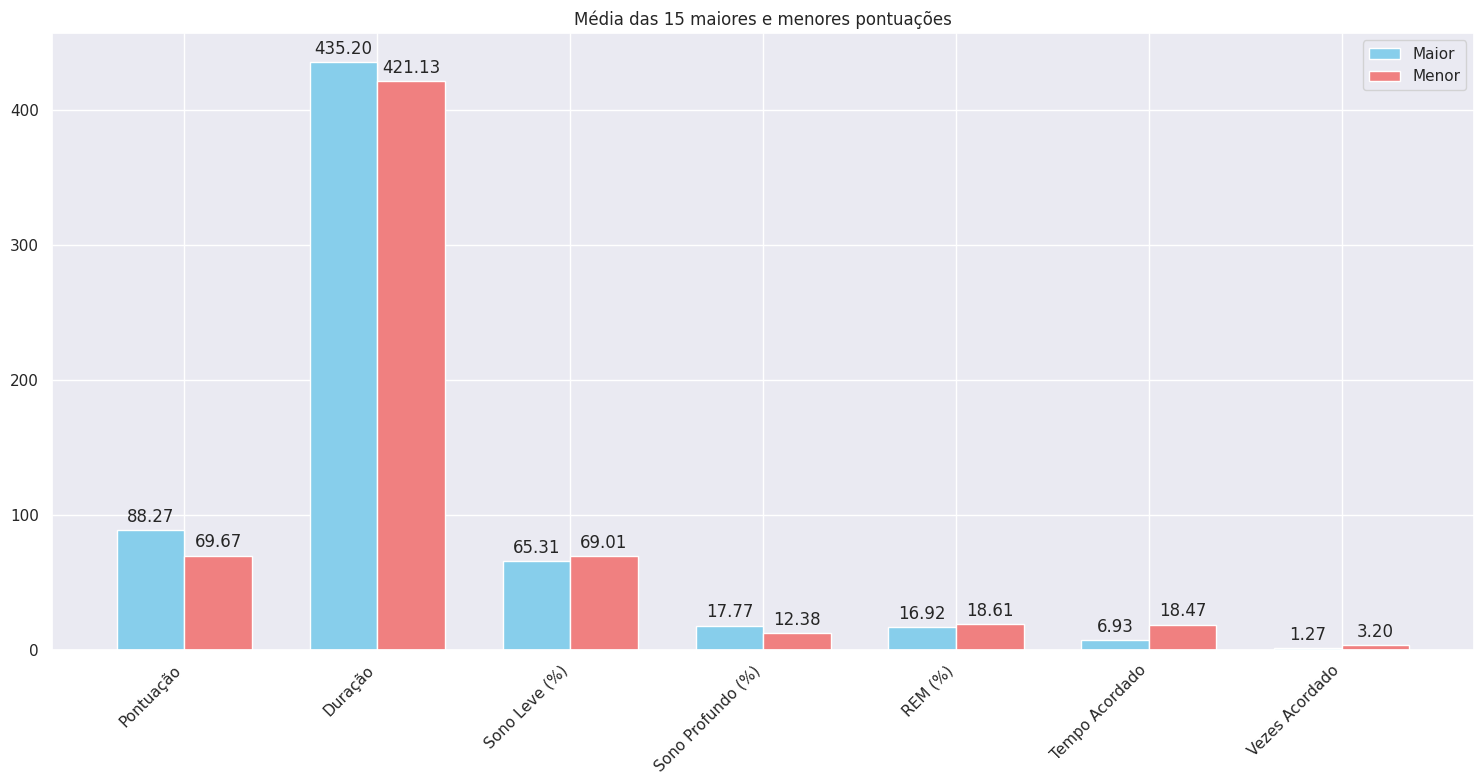

In [36]:
criar_side_by_side(alto=maiores_vals, baixo=menores_vals, categorias=categorias, title="Média das 15 maiores e menores pontuações")

In [37]:
maior_pontuacao = maiores.iloc[0].drop(["data", "dia_semana", "regularidade", "sono_leve", "sono_profundo", "REM"])
menor_pontuacao = menores.iloc[-1].drop(["data", "dia_semana", "regularidade","sono_leve", "sono_profundo", "REM"])

In [38]:
maior_pontuacao

pontuacao                93
duracao                 464
sono_leve_perc        67.67
sono_profundo_perc    17.24
REM_perc              15.09
tempo_acordado            6
vezes_acordado            1
Name: 1, dtype: object

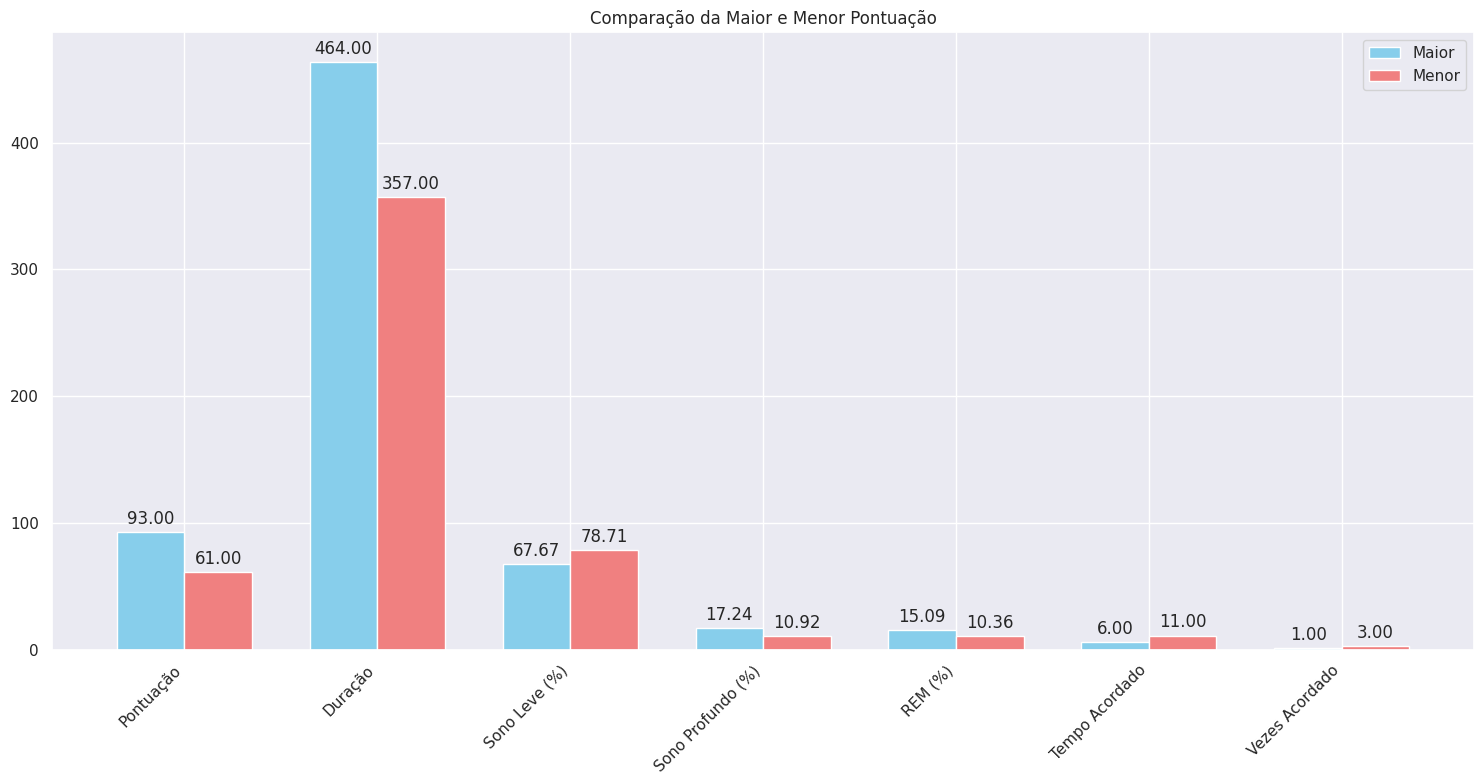

In [39]:
criar_side_by_side(alto=maior_pontuacao, baixo=menor_pontuacao, categorias=categorias, title="Comparação da Maior e Menor Pontuação")